In [5]:
# import featuretools as fts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
import h2o
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9); OpenJDK 64-Bit Server VM (build 11.0.10+9, mixed mode)
  Starting server from /Users/GLanku/Nike/hackathon/venv/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/11/tt9925cj40j98g3015hkt78c0000gn/T/tmppo4t4enr
  JVM stdout: /var/folders/11/tt9925cj40j98g3015hkt78c0000gn/T/tmppo4t4enr/h2o_GLanku_started_from_python.out
  JVM stderr: /var/folders/11/tt9925cj40j98g3015hkt78c0000gn/T/tmppo4t4enr/h2o_GLanku_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_GLanku_z27za1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
TRAIN_DIR = "../data/TRAIN.CSV"
TEST_DIR = "../data/TEST_FINAL.csv"

In [8]:
train = h2o.import_file("../data/TRAIN.CSV")
test = h2o.import_file("../data/TEST_FINAL.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
train

ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
T1000001,1,S1,L3,R1,2018-01-01 00:00:00,1,Yes,9,7011.84
T1000002,253,S4,L2,R1,2018-01-01 00:00:00,1,Yes,60,51789.1
T1000003,252,S3,L2,R1,2018-01-01 00:00:00,1,Yes,42,36868.2
T1000004,251,S2,L3,R1,2018-01-01 00:00:00,1,Yes,23,19715.2
T1000005,250,S2,L3,R4,2018-01-01 00:00:00,1,Yes,62,45614.5
T1000006,249,S1,L3,R2,2018-01-01 00:00:00,1,Yes,39,34211.2
T1000007,248,S1,L1,R2,2018-01-01 00:00:00,1,Yes,40,35352.7
T1000008,247,S1,L1,R3,2018-01-01 00:00:00,1,Yes,64,52650
T1000009,246,S3,L1,R3,2018-01-01 00:00:00,1,Yes,62,42633.8
T1000010,254,S4,L1,R1,2018-01-01 00:00:00,1,Yes,87,62572.8


In [19]:
train_cols = ["Store_id","Store_Type","Location_Type","Region_Code","Holiday","Date","Discount"]

In [20]:
predictors = train[train_cols]
response = train['Sales']

In [21]:
boston_glm = H2OGeneralizedLinearEstimator(alpha = 0.25)
boston_glm.train(x = train_cols,
                 y = "Sales",
                 training_frame = train)

# predict using the model and the testing dataset
predict = boston_glm.predict(test)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


<AxesSubplot:>

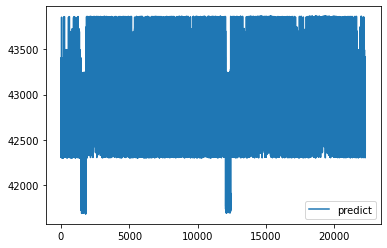

In [27]:
predict.as_data_frame().plot()

In [30]:
train.types

{'ID': 'string',
 'Store_id': 'int',
 'Store_Type': 'enum',
 'Location_Type': 'enum',
 'Region_Code': 'enum',
 'Date': 'time',
 'Holiday': 'int',
 'Discount': 'enum',
 '#Order': 'int',
 'Sales': 'real'}

In [28]:
from h2o.automl import H2OAutoML


In [33]:
3*60

180

In [35]:
aml = H2OAutoML(max_models=10,max_runtime_secs=180, seed=1)
aml.train(x=train_cols, y='Sales', training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_1_AutoML_2_20210919_185146,3.40648e+08,18456.6,3.40648e+08,13857.5,0.48262
XGBoost_1_AutoML_2_20210919_185146,9.41133e+08,30677.9,9.41133e+08,26575.7,1.03776


In [36]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GLM_1_AutoML_2_20210919_185146,3.40648e+08,18456.6,3.40648e+08,13857.5,0.48262
XGBoost_1_AutoML_2_20210919_185146,9.41133e+08,30677.9,9.41133e+08,26575.7,1.03776
